In [61]:
#Import necessary files
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pickle
import pandas as pd
from google.colab import files

In [62]:
#Read csv file from Solcast
SelebiPhikwe = pd.read_csv("/content/csv_-22.220377_28.100695_fixed_23_0_PT60M.csv")

### **EDA**

In [63]:

SelebiPhikwe.head()

,air_temp,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,gti,relative_humidity,surface_pressure,wind_direction_10m,wind_speed_10m,zenith,period_end,period
0,20,-141,0,0,0,0,76.4,0,0,0,0,91.1,920.1,93,5.3,123,2007-01-01T01:00:00Z,PT60M
1,20,-130,0,0,0,0,78.6,0,0,0,0,89.9,920.4,99,5.2,114,2007-01-01T02:00:00Z,PT60M
2,20,-122,0,0,0,0,77.9,0,0,0,0,89.4,921.0,103,4.9,102,2007-01-01T03:00:00Z,PT60M
3,20,-115,10,25,12,9,75.8,4,0,4,4,89.7,921.7,104,4.9,90,2007-01-01T04:00:00Z,PT60M
4,20,-110,73,326,151,92,69.6,45,0,45,43,90.0,922.5,103,5.0,77,2007-01-01T05:00:00Z,PT60M


In [64]:
#Standardize Dates
SelebiPhikwe['Year'] = pd.DatetimeIndex(SelebiPhikwe['period_end']).year
SelebiPhikwe['Month'] = pd.DatetimeIndex(SelebiPhikwe['period_end']).month
SelebiPhikwe['Day'] = pd.DatetimeIndex(SelebiPhikwe['period_end']).day
SelebiPhikwe['Hour'] = pd.DatetimeIndex(SelebiPhikwe['period_end']).hour

In [65]:
#Create Columns for Longitude and Latitude
SelebiPhikwe['Latitude'] = -22.220377
SelebiPhikwe['Longitude'] = 28.100695

In [66]:
#Check for available columns
SelebiPhikwe.columns

Index(['air_temp', 'azimuth', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi',
       'clearsky_gti', 'cloud_opacity', 'dhi', 'dni', 'ghi', 'gti',
       'relative_humidity', 'surface_pressure', 'wind_direction_10m',
       'wind_speed_10m', 'zenith', 'period_end', 'period', 'Year', 'Month',
       'Day', 'Hour', 'Latitude', 'Longitude'],
      dtype='object')

In [67]:
SelebiPhikwe.describe()

,air_temp,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,...,surface_pressure,wind_direction_10m,wind_speed_10m,zenith,Year,Month,Day,Hour,Latitude,Longitude
count,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,...,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.000000,148416.00000,1.484160e+05,1.484160e+05
mean,22.241982,-1.525530,49.816213,344.335705,275.374326,292.766110,13.869195,83.265227,220.634393,226.549381,...,923.443785,107.178727,3.313678,90.257486,2014.967119,6.501044,15.715920,11.50000,-2.222038e+01,2.810069e+01
std,6.659032,96.705283,60.972206,383.585419,352.530839,371.419022,22.027830,123.099873,327.466538,306.673346,...,4.597405,77.348010,1.573634,43.927814,4.882154,3.437966,8.803217,6.92221,1.421090e-14,1.421090e-14
min,2.000000,-177.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,906.800000,0.000000,0.000000,4.000000,2007.000000,1.000000,1.000000,0.00000,-2.222038e+01,2.810070e+01
25%,18.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,920.100000,67.000000,2.200000,52.000000,2011.000000,4.000000,8.000000,5.75000,-2.222038e+01,2.810070e+01
50%,22.000000,-3.000000,10.000000,61.000000,16.000000,14.000000,0.000000,10.000000,0.000000,13.000000,...,923.100000,80.000000,3.000000,90.000000,2015.000000,7.000000,16.000000,11.50000,-2.222038e+01,2.810070e+01
75%,27.000000,88.000000,95.000000,769.000000,592.000000,650.000000,21.900000,116.000000,463.000000,443.000000,...,926.600000,100.000000,4.300000,129.000000,2019.000000,9.000000,23.000000,17.25000,-2.222038e+01,2.810070e+01
max,43.000000,172.000000,421.000000,1042.000000,1125.000000,1097.000000,97.000000,620.000000,1042.000000,1125.000000,...,941.300000,360.000000,10.000000,175.000000,2023.000000,12.000000,31.000000,23.00000,-2.222038e+01,2.810070e+01


In [68]:
SelebiPhikwe.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148416 entries, 0 to 148415
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   air_temp            148416 non-null  int64  
 1   azimuth             148416 non-null  int64  
 2   clearsky_dhi        148416 non-null  int64  
 3   clearsky_dni        148416 non-null  int64  
 4   clearsky_ghi        148416 non-null  int64  
 5   clearsky_gti        148416 non-null  int64  
 6   cloud_opacity       148416 non-null  float64
 7   dhi                 148416 non-null  int64  
 8   dni                 148416 non-null  int64  
 9   ghi                 148416 non-null  int64  
 10  gti                 148416 non-null  int64  
 11  relative_humidity   148416 non-null  float64
 12  surface_pressure    148416 non-null  float64
 13  wind_direction_10m  148416 non-null  int64  
 14  wind_speed_10m      148416 non-null  float64
 15  zenith              148416 non-nul

In [69]:
SelebiPhikwe.shape

(148416, 24)

In [70]:
#Remove unused column
SelebiPhikwe = SelebiPhikwe.drop(['period'], axis=1)

In [71]:
#Check for null values
SelebiPhikwe.isnull().sum()

air_temp              0
azimuth               0
clearsky_dhi          0
clearsky_dni          0
clearsky_ghi          0
clearsky_gti          0
cloud_opacity         0
dhi                   0
dni                   0
ghi                   0
gti                   0
relative_humidity     0
surface_pressure      0
wind_direction_10m    0
wind_speed_10m        0
zenith                0
period_end            0
Year                  0
Month                 0
Day                   0
Hour                  0
Latitude              0
Longitude             0
dtype: int64

In [72]:
# Interpolate data to fill null values

SelebiPhikwe = SelebiPhikwe.interpolate(method='linear')


In [73]:
#Check for null values
SelebiPhikwe.isnull().sum()

air_temp              0
azimuth               0
clearsky_dhi          0
clearsky_dni          0
clearsky_ghi          0
clearsky_gti          0
cloud_opacity         0
dhi                   0
dni                   0
ghi                   0
gti                   0
relative_humidity     0
surface_pressure      0
wind_direction_10m    0
wind_speed_10m        0
zenith                0
period_end            0
Year                  0
Month                 0
Day                   0
Hour                  0
Latitude              0
Longitude             0
dtype: int64

In [74]:
#Remove row where period_end is missing

SelebiPhikwe = SelebiPhikwe.dropna(subset=['period_end'])


In [75]:
SelebiPhikwe.isnull().sum()

air_temp              0
azimuth               0
clearsky_dhi          0
clearsky_dni          0
clearsky_ghi          0
clearsky_gti          0
cloud_opacity         0
dhi                   0
dni                   0
ghi                   0
gti                   0
relative_humidity     0
surface_pressure      0
wind_direction_10m    0
wind_speed_10m        0
zenith                0
period_end            0
Year                  0
Month                 0
Day                   0
Hour                  0
Latitude              0
Longitude             0
dtype: int64

In [76]:
# Find the minimum and maximum values in the "Solar Irradiance" column
ghi_min_value = SelebiPhikwe["clearsky_ghi"].min()
ghi_max_value = SelebiPhikwe["clearsky_ghi"].max()

print(ghi_min_value,ghi_max_value)

0 1125


In [77]:
#Creating a heatmap of the correlation matrix of the World_data DataFrame
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_positve_criteria,correlation_negative_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.drop(['Month','Day','Year','Hour','Latitude','Longitude'],axis=1).corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    positiverelevant_features = target[target>correlation_positve_criteria]
    negativerelevant_featuress = target[target<correlation_negative_criteria]
    print(positiverelevant_features)
    print(negativerelevant_featuress)

<ipython-input-77-15b7e978a4b8>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataframe.drop(['Month','Day','Year','Hour','Latitude','Longitude'],axis=1).corr()


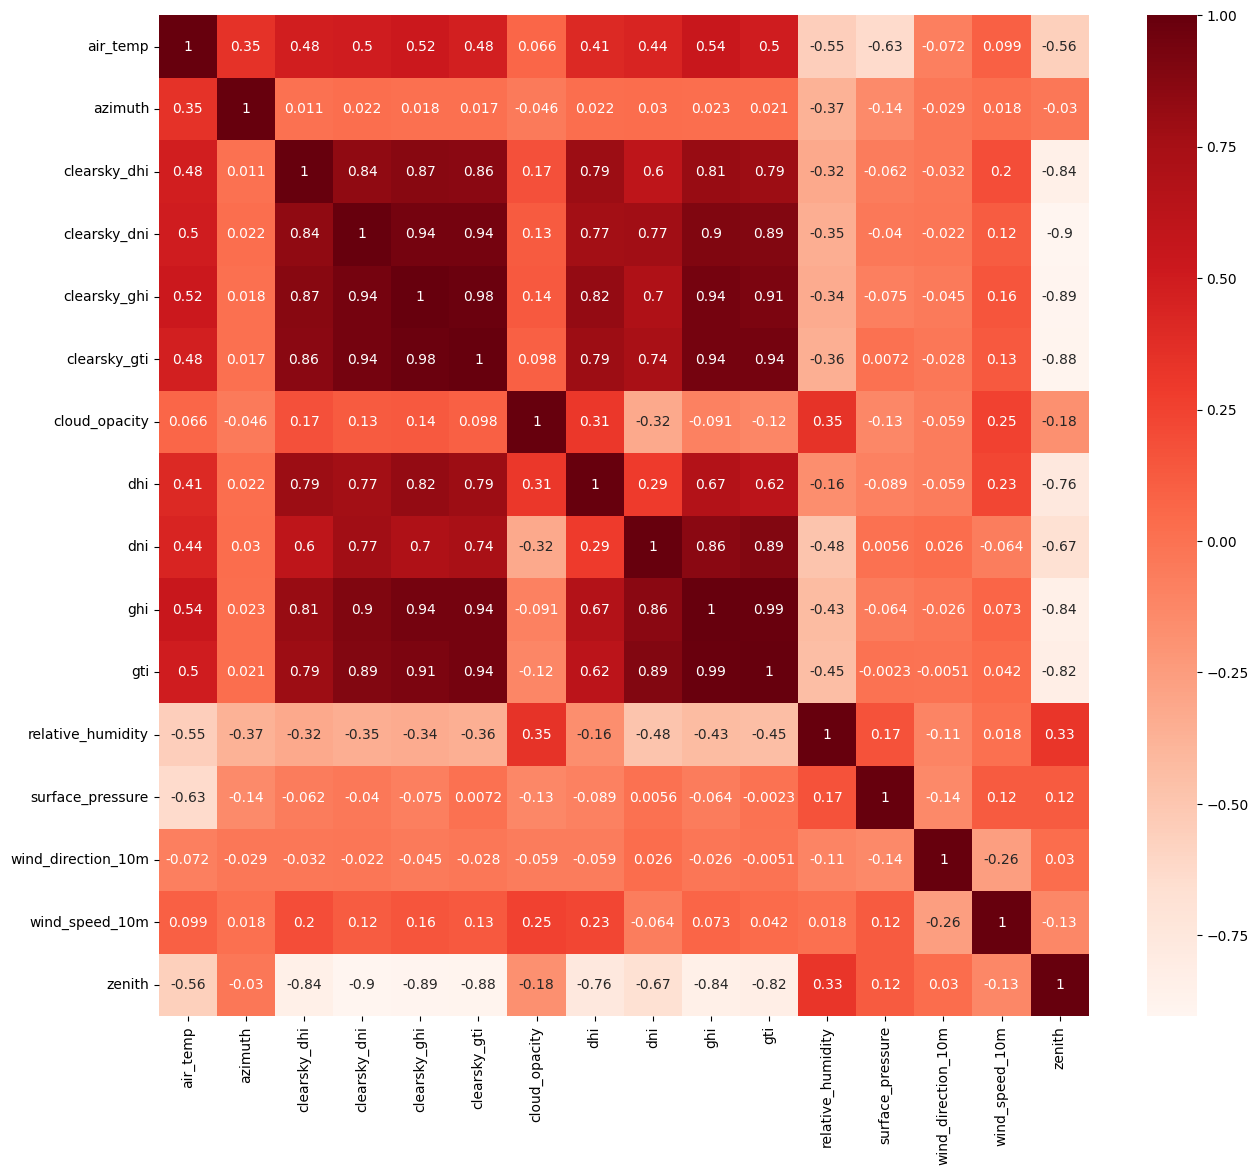

clearsky_dhi    0.870171
clearsky_dni    0.942342
clearsky_ghi    1.000000
clearsky_gti    0.983425
dhi             0.824798
dni             0.701060
ghi             0.941077
gti             0.913892
zenith          0.893902
Name: clearsky_ghi, dtype: float64
Series([], Name: clearsky_ghi, dtype: float64)


In [78]:
build_pearson_correlation_matrix_of_dataframe(15, 13, SelebiPhikwe,'clearsky_ghi', 0.7,-0.7)

<ipython-input-79-09a18f7a8d9f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=SelebiPhikwe.groupby('Hour').mean(), x='Hour', y='clearsky_ghi', color='Orange')


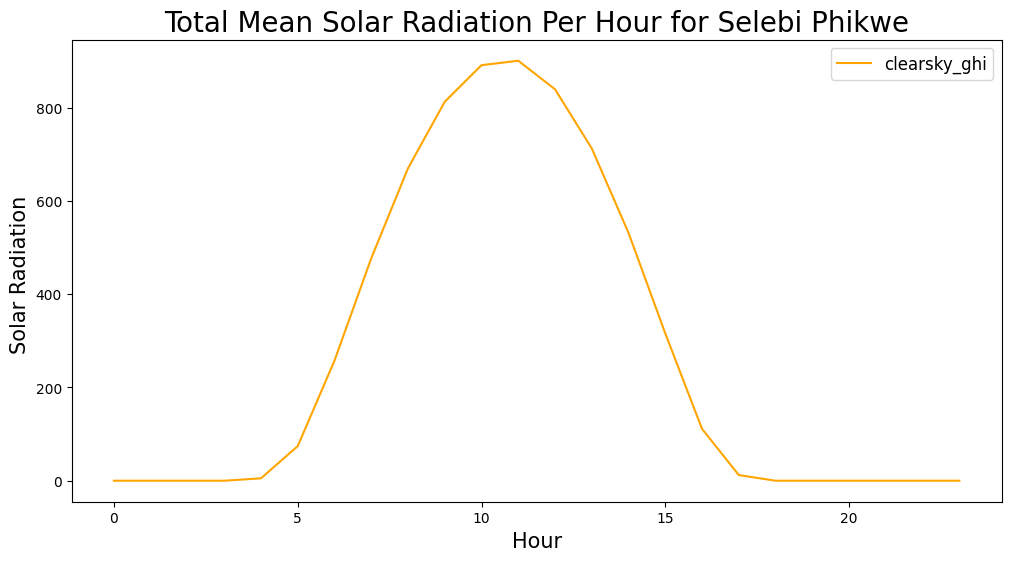

In [79]:
#Plot line plot for hourly data
plt.figure(figsize=(12,6))
sns.lineplot(data=SelebiPhikwe.groupby('Hour').mean(), x='Hour', y='clearsky_ghi', color='Orange')

plt.xlabel('Hour', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Hour for Selebi Phikwe', fontsize=20)
plt.show();

<ipython-input-80-891b48cbe4c2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=SelebiPhikwe.groupby('Day').mean(), x='Day', y='clearsky_ghi', color='Blue')


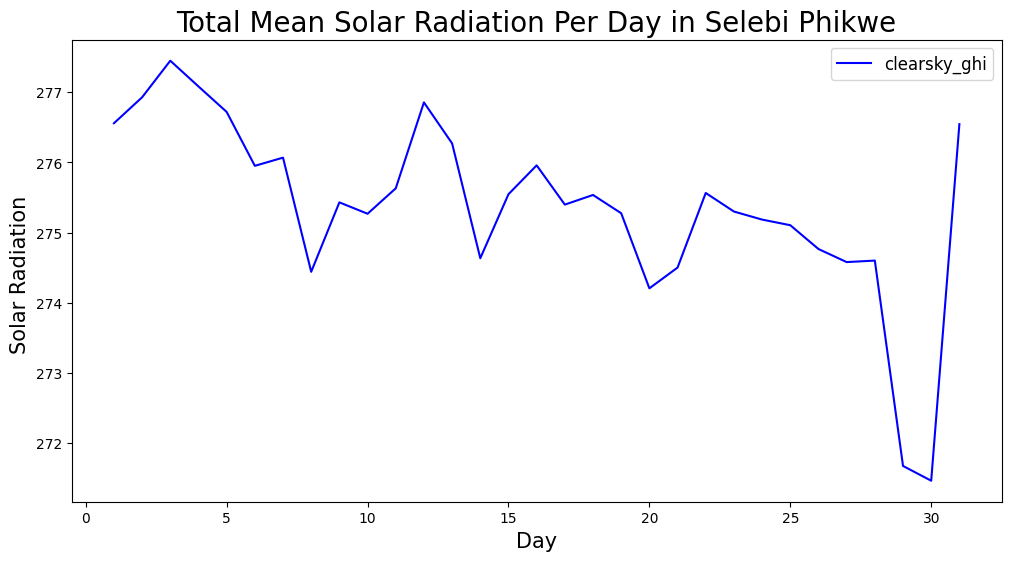

In [80]:
#Plot line plot for daily data
plt.figure(figsize=(12,6))
sns.lineplot(data=SelebiPhikwe.groupby('Day').mean(), x='Day', y='clearsky_ghi', color='Blue')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Day in Selebi Phikwe', fontsize=20)
plt.show();

<ipython-input-81-46b3ade2a2f0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=SelebiPhikwe.groupby('Month').mean(), x='Month', y='clearsky_ghi', color='Green')


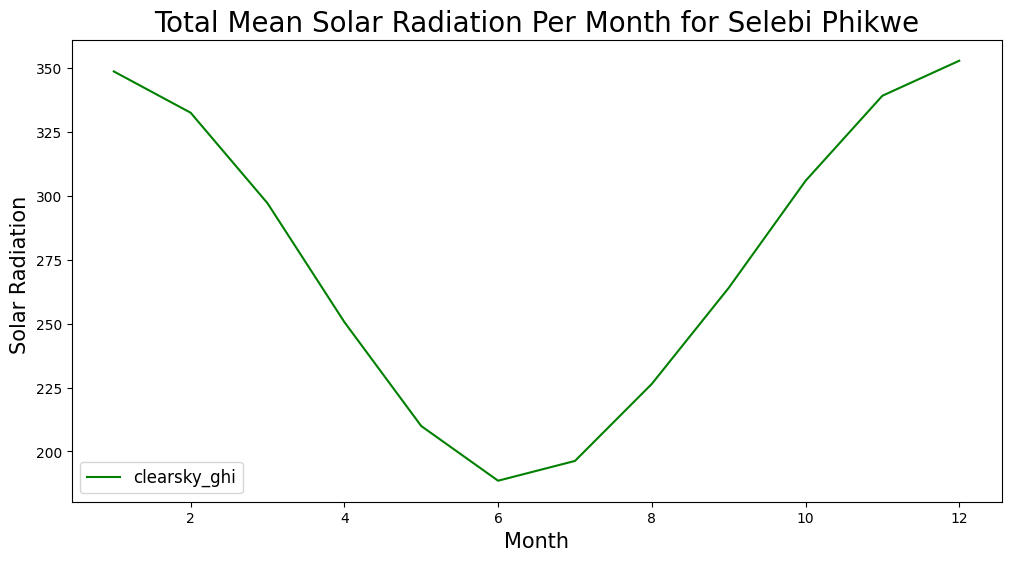

In [81]:
#Plot line plot for monthly data
plt.figure(figsize=(12,6))
sns.lineplot(data=SelebiPhikwe.groupby('Month').mean(), x='Month', y='clearsky_ghi', color='Green')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Month for Selebi Phikwe', fontsize=20)
plt.show();

<ipython-input-82-c9a8427114f3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=SelebiPhikwe.groupby('Year').mean(), x='Year', y='clearsky_ghi', color='Red')


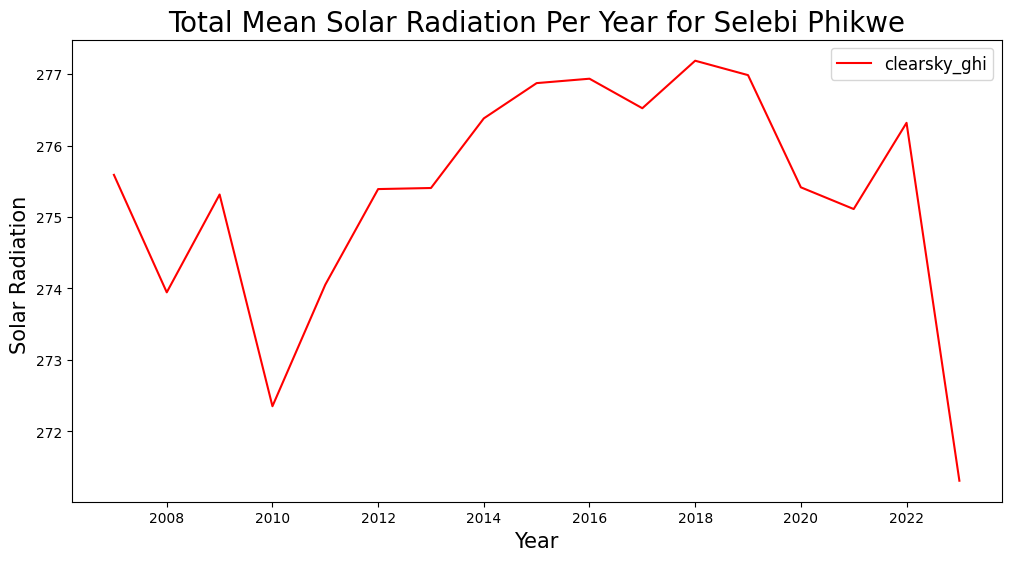

In [82]:
#Plot line plot for yearly data
plt.figure(figsize=(12,6))
sns.lineplot(data=SelebiPhikwe.groupby('Year').mean(), x='Year', y='clearsky_ghi', color='Red')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Solar Radiation ', fontsize=15)
plt.legend(['clearsky_ghi'], fontsize=12)
plt.title('Total Mean Solar Radiation Per Year for Selebi Phikwe', fontsize=20)
plt.show();

In [83]:
#Check for Unique year values
SelebiPhikwe['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023])

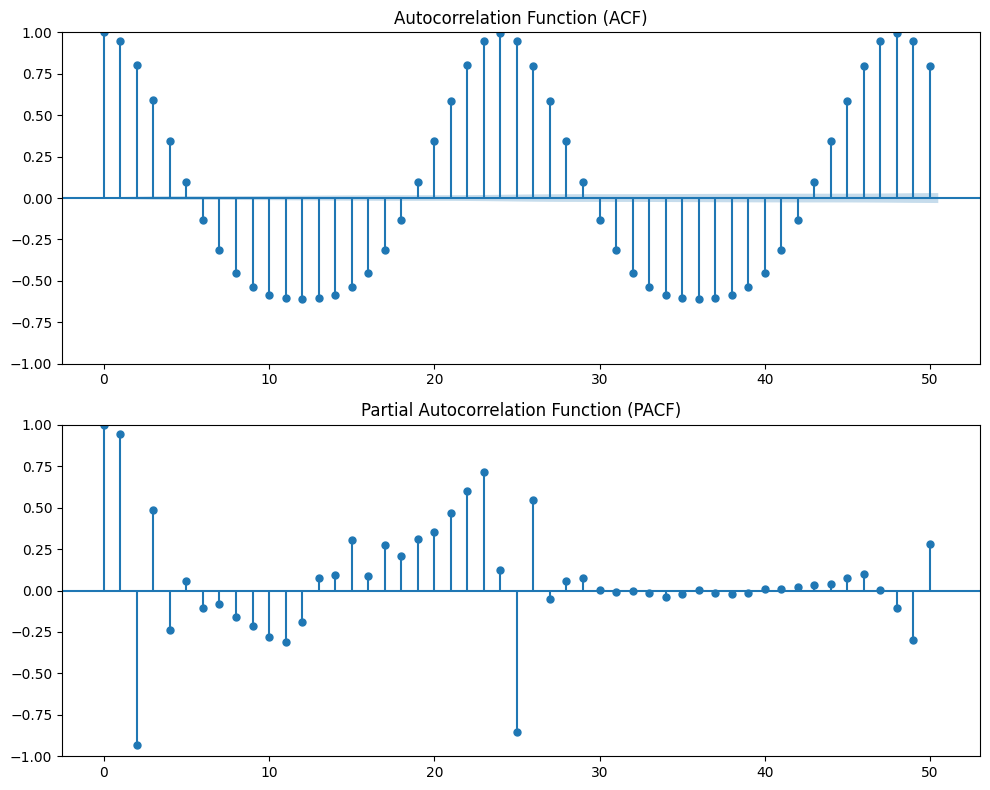

In [84]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(SelebiPhikwe['clearsky_ghi'], ax=ax[0], lags=50)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(SelebiPhikwe['clearsky_ghi'], ax=ax[1], lags=50)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

## Unsupervised Learning to establish clusters through KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


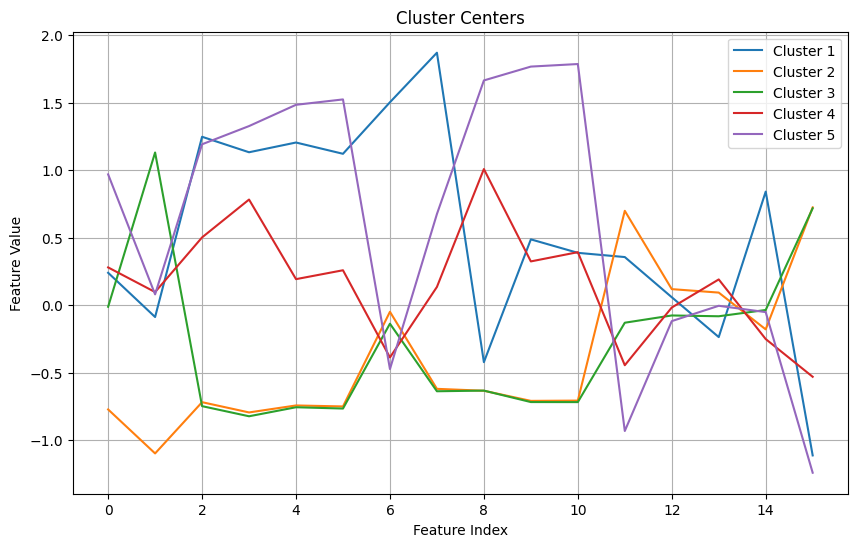

Cluster Counts:
1    44806
2    41330
4    26387
0    18022
3    17871
Name: cluster, dtype: int64

Cluster 0 - Sample Transactions/Reviews:
   air_temp  azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  clearsky_gti  \
5        20     -106           116           589           377           285   
6        20     -102           128           751           606           509   
7        20      -99           133           837           801           709   
8        20      -97           139           877           943           858   
9        20      -99           139           901          1026           944   

   cloud_opacity  dhi  dni  ghi  ...  wind_speed_10m  zenith  \
5           84.8   57    0   57  ...             5.1      64   
6           83.7   98    0   98  ...             5.4      51   
7           73.3  219    0  219  ...             5.8      37   
8           47.1  493    5  497  ...             5.9      23   
9           65.4  354    0  354  ...             5.8      

In [85]:
# KMeans clustering
data = SelebiPhikwe.drop(['period_end','Latitude','Longitude','Year','Month','Day','Hour'], axis=1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (K)
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans model to the scaled data
kmeans.fit(scaled_data)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
SelebiPhikwe['cluster'] = cluster_labels

# Visualize cluster centers (optional)
cluster_centers = kmeans.cluster_centers_

# Plot cluster centers
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.plot(cluster_centers[i], label=f'Cluster {i+1}')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Cluster Centers')
plt.legend()
plt.grid(True)
plt.show()

# Analyze clusters
cluster_counts = SelebiPhikwe['cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# You can further analyze each cluster to understand the characteristics of transactions/reviews within each cluster
for cluster_id in range(num_clusters):
    cluster_data = SelebiPhikwe[SelebiPhikwe['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} - Sample Transactions/Reviews:")
    print(cluster_data.head())

# Optionally, you can save the DataFrame with cluster labels for further analysis
cluster_data.to_csv('SelebiPhikweclustered_data.csv', index=False)


Cluster 0 - Feature Descriptions:
           air_temp       azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  \
count  18022.000000  18022.000000  18022.000000  18022.000000  18022.000000   
mean      23.849684     -9.860948    125.930307    779.155699    700.319498   
std        4.799029     74.628567     48.013515    139.350404    219.182386   
min        9.000000   -110.000000     48.000000    128.000000    177.000000   
25%       21.000000    -83.000000     94.000000    706.000000    531.000000   
50%       24.000000    -29.000000    114.000000    810.000000    701.000000   
75%       27.000000     66.000000    143.000000    882.000000    877.000000   
max       42.000000    118.000000    421.000000   1013.000000   1094.000000   

       clearsky_gti  cloud_opacity           dhi           dni           ghi  \
count  18022.000000   18022.000000  18022.000000  18022.000000  18022.000000   
mean     709.437854      47.005621    313.492010     82.809233    376.270336   
std      221.

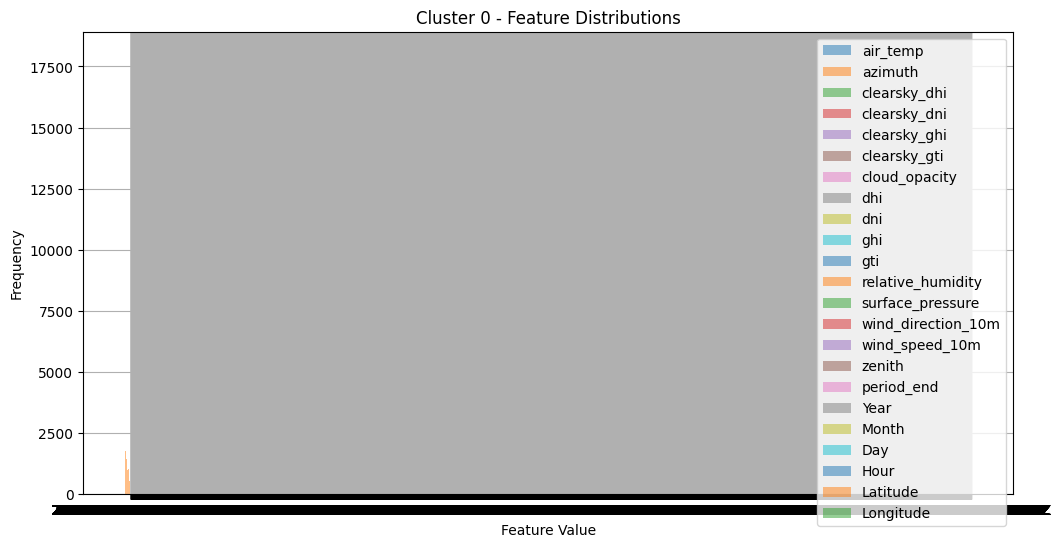


Cluster 1 - Feature Descriptions:
           air_temp       azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  \
count  44806.000000  44806.000000  44806.000000  44806.000000  44806.000000   
mean      17.108735   -107.575481      6.095746     40.142280     14.021694   
std        5.238029     33.849417     16.485749    111.751606     40.628668   
min        2.000000   -177.000000      0.000000      0.000000      0.000000   
25%       13.000000   -129.000000      0.000000      0.000000      0.000000   
50%       18.000000   -105.000000      0.000000      0.000000      0.000000   
75%       21.000000    -83.000000      0.000000      0.000000      0.000000   
max       31.000000    106.000000    155.000000    729.000000    319.000000   

       clearsky_gti  cloud_opacity           dhi           dni           ghi  \
count  44806.000000   44806.000000  44806.000000  44806.000000  44806.000000   
mean      14.693813      12.819866      7.150181     13.522988      9.586038   
std       45.

In [ ]:
# Analyze cluster characteristics
for cluster_id in range(num_clusters):
    cluster_data = SelebiPhikwe[SelebiPhikwe['cluster'] == cluster_id]

    # Describe feature values within the cluster
    cluster_description = cluster_data.drop(['cluster'], axis=1).describe()
    print(f"\nCluster {cluster_id} - Feature Descriptions:")
    print(cluster_description)

    # Visualize feature distributions within the cluster
    plt.figure(figsize=(12, 6))
    for column in cluster_data.drop(['cluster'], axis=1).columns:
        plt.hist(cluster_data[column], bins=20, alpha=0.5, label=column)
    plt.title(f'Cluster {cluster_id} - Feature Distributions')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Computing silhouette score
silhouette_avg = silhouette_score(data, cluster_labels)

print("Silhouette Score:", silhouette_avg)


## Supervised Learning through LSTM and Random Forest


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(SelebiPhikwe['clearsky_ghi'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_data, train_data, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)


# Evaluate the model
true_values = SelebiPhikwe['clearsky_ghi'].values[train_size:]
LS_mse = mean_squared_error(true_values, predictions)
LS_rmse = np.sqrt(LS_mse)
print('MSE:', LS_mse)
print('RMSE', LS_rmse)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(true_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('Actual vs. Predicted GHI (LSTM)')
plt.legend()
plt.show()


In [ ]:
# Save model to pickle

import pickle

with open('SelebiPhikwe_LSTM_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Applying random forest

# Prepare the data
X_train = SelebiPhikwe.drop(['clearsky_ghi','period_end','cluster'], axis=1)
y_train = SelebiPhikwe['clearsky_ghi']

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=50, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate the model
RF_mse = mean_squared_error(y_train, y_pred)
RF_rmse = np.sqrt(RF_mse)
print('MSE:', RF_mse)
print('RMSE', RF_rmse)

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('Actual vs. Predicted GHI (Random Forest)')
plt.legend()
plt.show()


In [ ]:
# Create model pickle file
with open('SelebiPhikwe_RF_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)

In [ ]:
# Create a bar plot to display the importance of each feature
fig = plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [ ]:
# Plot RMSE for both models

# Create a bar chart to compare the RMSE values
labels = ['LSTM', 'Random Forest']
values = [LS_rmse, RF_rmse]

plt.bar(labels, values)
plt.title('RMSE Comparison between LSTM and Random Forest Models')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Forecast using rf and show predicted only
from google.colab import files
# Load the saved model
with open('SelebiPhikwe_RF_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Prepare the data
X_test = SelebiPhikwe.drop(['clearsky_ghi','period_end','cluster'], axis=1)

# Make predictions
y_pred = model.predict(X_test)

# Create a new DataFrame to store the predictions
future_predictions = pd.DataFrame(y_pred, columns=['clearsky_ghi'])

# Set the index of the future_predictions DataFrame
future_predictions.index = pd.date_range(start='2023-01-01', periods=len(y_pred), freq='H')

# Convert the future_predictions DataFrame to a CSV file
future_predictions.to_csv('SelebiPhikwefuture_predictions.csv', index=True)

# Download the CSV file
files.download('SelebiPhikwefuture_predictions.csv')

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(future_predictions['clearsky_ghi'], label='Predicted GHI')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.title('Predicted GHI for Khawa from 2023 to 2027')
plt.legend()
plt.show()